# Task 3: Future Market Trend Forecasting

Generate 6-12 month forecasts using trained models from Task 2 and analyze trends, risks, and opportunities.

In [1]:
# Setup
import sys
import os
sys.path.append('../src')

from task3.future_forecaster import FutureMarketForecaster
from task3.trend_analyzer import TrendAnalyzer
from task3.forecast_visualizer import ForecastVisualizer

import warnings
warnings.filterwarnings('ignore')

## 1. Initialize Forecaster and Load Models

In [2]:
# Initialize forecaster for Tesla
forecaster = FutureMarketForecaster('TSLA')

# Load trained models from Task 2
models_loaded = forecaster.load_trained_models()
print(f"Models loaded: {models_loaded}")

✅ Model loaded from ../models/arima_model.pkl
✅ LSTM model loaded from ../models/lstm_model.h5
✅ Models loaded - ARIMA: True, LSTM: True
Models loaded: True


## 2. Generate ARIMA Forecast (6 months)

In [3]:
# Generate ARIMA forecast
arima_result = forecaster.generate_future_forecast(months=6, model_type='arima')

if arima_result:
    print("✅ ARIMA forecast generated")
    print(f"Forecast period: {len(arima_result['forecast'])} days")
    print(f"Current price: ${arima_result['historical_data'].iloc[-1]:.2f}")
    print(f"Forecast end: ${arima_result['forecast'].iloc[-1]:.2f}")
else:
    print("❌ ARIMA forecast failed")

✅ Loaded TSLA data: 1256 observations
📅 Date range: 2020-08-10 to 2025-08-08
Searching for optimal ARIMA parameters...
Best parameters: ARIMA(2, 1, 3) with AIC: 9324.93
✅ ARIMA(2, 1, 3) model fitted successfully
✅ ARIMA forecast generated
Forecast period: 126 days
Current price: $329.65
Forecast end: $328.98


## 3. Analyze ARIMA Forecast Trends

In [4]:
if arima_result:
    # Trend analysis
    trend_data = TrendAnalyzer.detect_trend(arima_result['forecast'])
    risk_data = TrendAnalyzer.assess_risk_levels(
        arima_result['forecast'], 
        arima_result.get('confidence_intervals')
    )
    
    print("📊 ARIMA FORECAST ANALYSIS:")
    print(f"Trend Direction: {trend_data['direction']}")
    print(f"Expected Return: {trend_data['total_change_pct']:.1f}%")
    print(f"Risk Level: {risk_data['risk_level']}")
    print(f"Volatility: {risk_data['volatility_pct']:.1f}%")
    
    if 'uncertainty_pct' in risk_data:
        print(f"Avg Uncertainty: {risk_data['uncertainty_pct']:.1f}%")

📊 ARIMA FORECAST ANALYSIS:
Trend Direction: Sideways
Expected Return: 0.2%
Risk Level: Low
Volatility: 1.8%
Avg Uncertainty: nan%


## 4. Visualize ARIMA Forecast

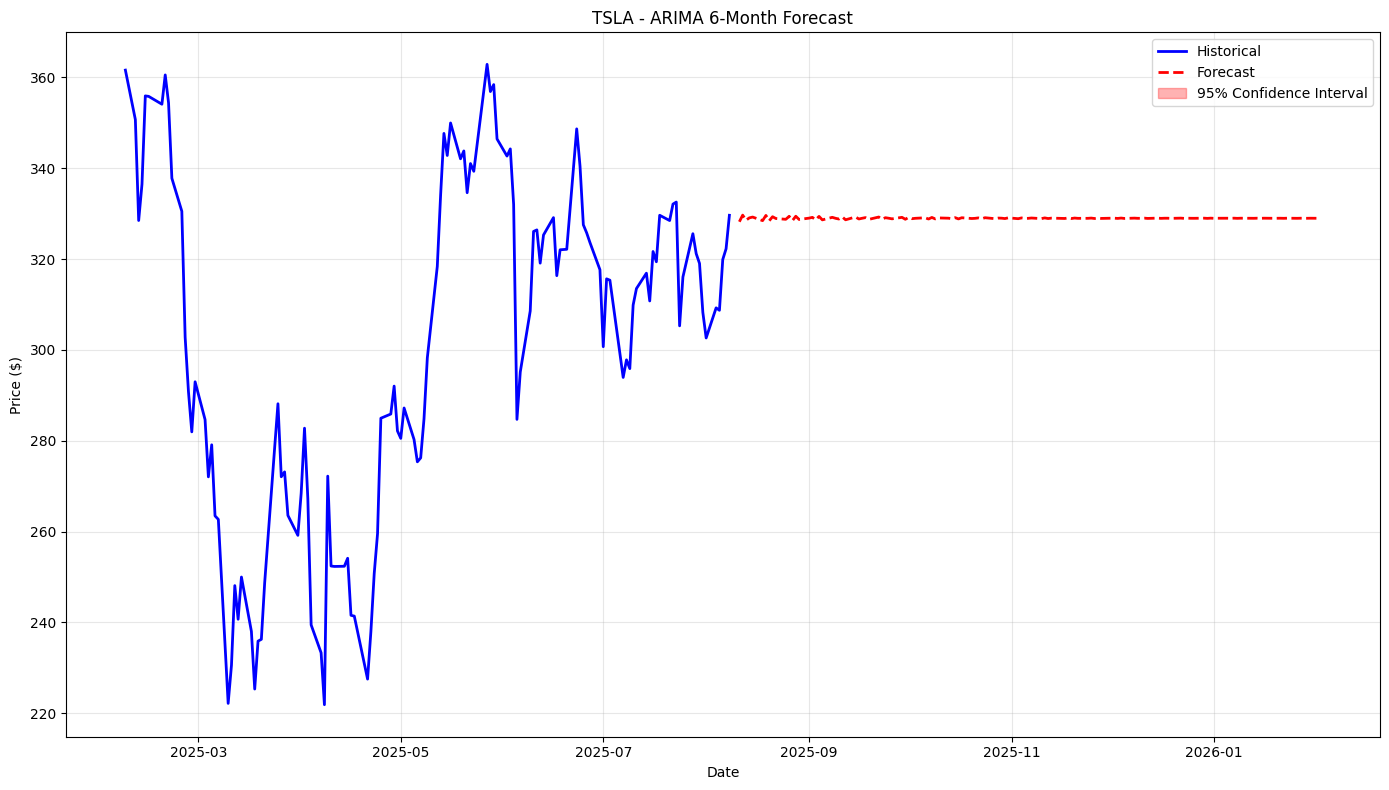

In [5]:
if arima_result:
    # Main forecast plot with confidence intervals
    ForecastVisualizer.plot_forecast_with_confidence(
        arima_result['historical_data'],
        arima_result['forecast'],
        arima_result.get('confidence_intervals'),
        "TSLA - ARIMA 6-Month Forecast"
    )

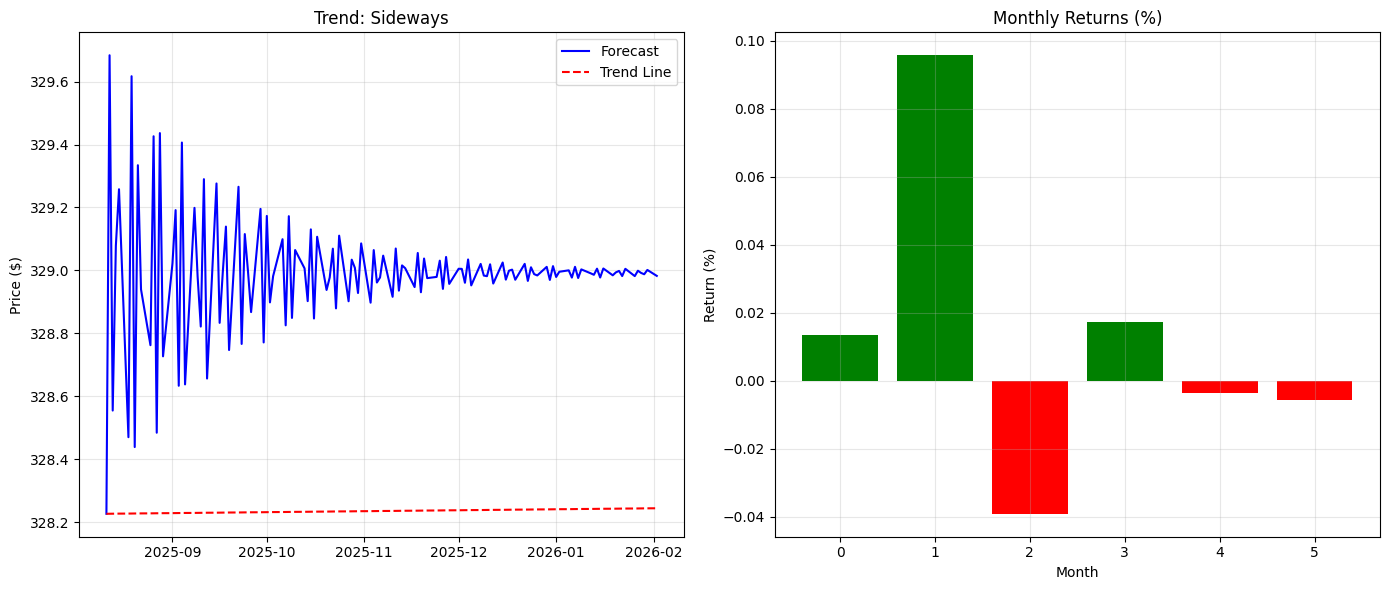

In [6]:
if arima_result:
    # Trend analysis visualization
    ForecastVisualizer.plot_trend_analysis(arima_result['forecast'], trend_data)

## 5. Generate LSTM Forecast (6 months)

In [7]:
# Generate LSTM forecast
lstm_result = forecaster.generate_future_forecast(months=6, model_type='lstm')

if lstm_result:
    print("✅ LSTM forecast generated")
    print(f"Forecast period: {len(lstm_result['forecast'])} days")
    print(f"Current price: ${lstm_result['historical_data'].iloc[-1]:.2f}")
    print(f"Forecast end: ${lstm_result['forecast'].iloc[-1]:.2f}")
else:
    print("❌ LSTM forecast failed (TensorFlow may not be available)")

✅ Loaded TSLA data: 1256 observations
📅 Date range: 2020-08-10 to 2025-08-08
✅ LSTM forecast generated
Forecast period: 126 days
Current price: $329.65
Forecast end: $190.83


## 6. Analyze LSTM Forecast (if available)

🧠 LSTM FORECAST ANALYSIS:
Trend Direction: Strong Downward
Expected Return: -40.1%
Risk Level: Low
Volatility: 3.6%


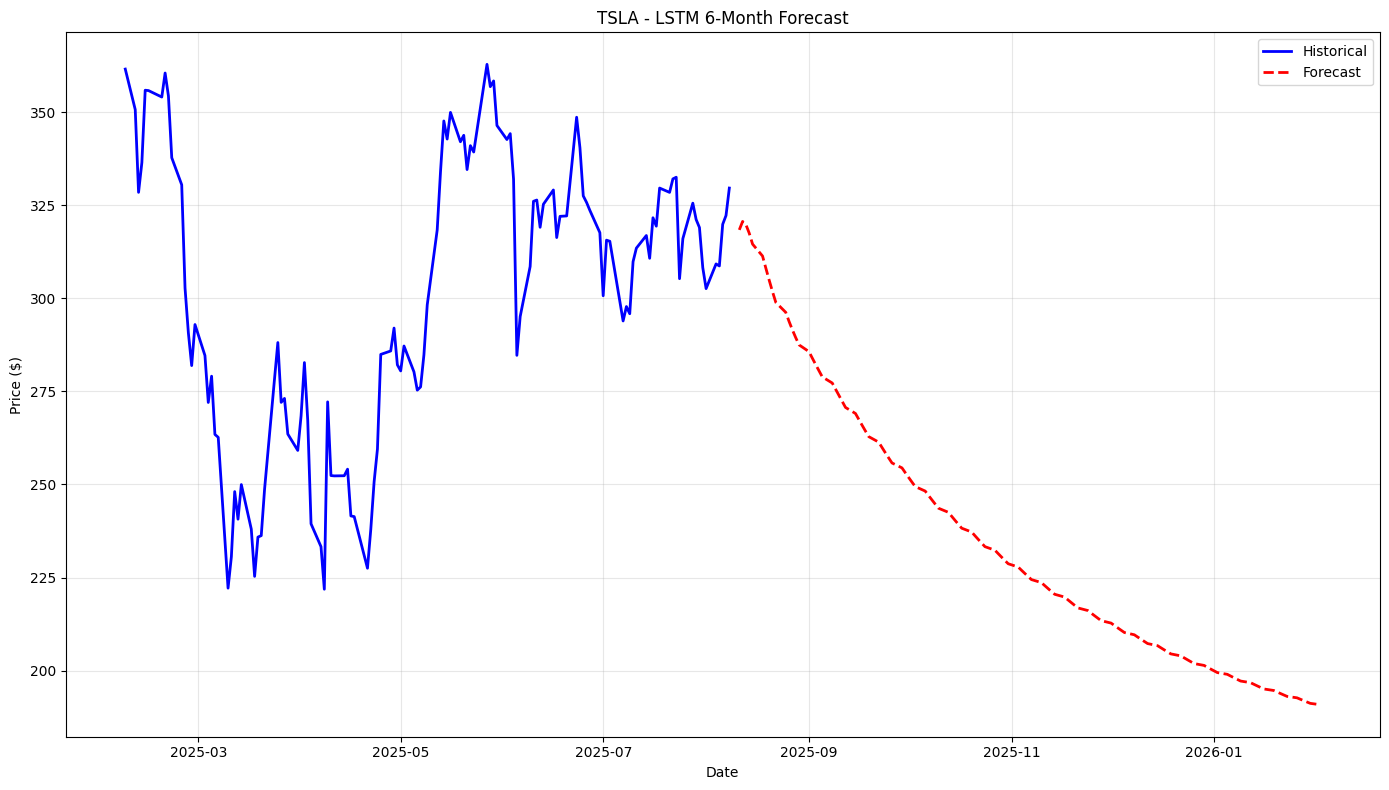

In [8]:
if lstm_result:
    # LSTM trend analysis
    lstm_trend = TrendAnalyzer.detect_trend(lstm_result['forecast'])
    lstm_risk = TrendAnalyzer.assess_risk_levels(lstm_result['forecast'])
    
    print("🧠 LSTM FORECAST ANALYSIS:")
    print(f"Trend Direction: {lstm_trend['direction']}")
    print(f"Expected Return: {lstm_trend['total_change_pct']:.1f}%")
    print(f"Risk Level: {lstm_risk['risk_level']}")
    print(f"Volatility: {lstm_risk['volatility_pct']:.1f}%")
    
    # Visualize LSTM forecast
    ForecastVisualizer.plot_forecast_with_confidence(
        lstm_result['historical_data'],
        lstm_result['forecast'],
        title="TSLA - LSTM 6-Month Forecast"
    )

## 7. Opportunities and Risks Analysis

In [9]:
# Analyze opportunities and risks for available models
models = []
if arima_result:
    models.append(('ARIMA', arima_result, trend_data, risk_data))
if lstm_result:
    models.append(('LSTM', lstm_result, lstm_trend, lstm_risk))

for model_name, result, trend, risk in models:
    opportunities = TrendAnalyzer.identify_opportunities(trend, risk)
    risks = TrendAnalyzer.identify_risks(trend, risk)
    
    print(f"\n🎯 {model_name} OPPORTUNITIES:")
    for opp in opportunities:
        print(f"  • {opp}")
    
    print(f"\n⚠️ {model_name} RISKS:")
    for r in risks:
        print(f"  • {r}")


🎯 ARIMA OPPORTUNITIES:

⚠️ ARIMA RISKS:

🎯 LSTM OPPORTUNITIES:

⚠️ LSTM RISKS:
  • Significant decline risk: -40.1%
  • Large potential drawdown: -40.5%


## 8. Investment Recommendations

In [10]:
print("💡 INVESTMENT RECOMMENDATIONS:")
print("-" * 40)

for model_name, result, trend, risk in models:
    # Generate recommendation
    if trend['total_change_pct'] > 10 and risk['risk_level'] != 'High':
        recommendation = "BUY - Positive outlook with manageable risk"
    elif trend['total_change_pct'] < -10:
        recommendation = "SELL - Negative outlook"
    elif risk['risk_level'] == 'High':
        recommendation = "HOLD - High uncertainty"
    else:
        recommendation = "HOLD - Neutral outlook"
    
    print(f"{model_name}: {recommendation}")

💡 INVESTMENT RECOMMENDATIONS:
----------------------------------------
ARIMA: HOLD - Neutral outlook
LSTM: SELL - Negative outlook


## 9. Confidence Interval Analysis (ARIMA only)

📊 CONFIDENCE INTERVAL ANALYSIS:
Initial width: nan%
Final width: nan%
Width expansion: nan%
Reliability: Low reliability - significant long-term uncertainty


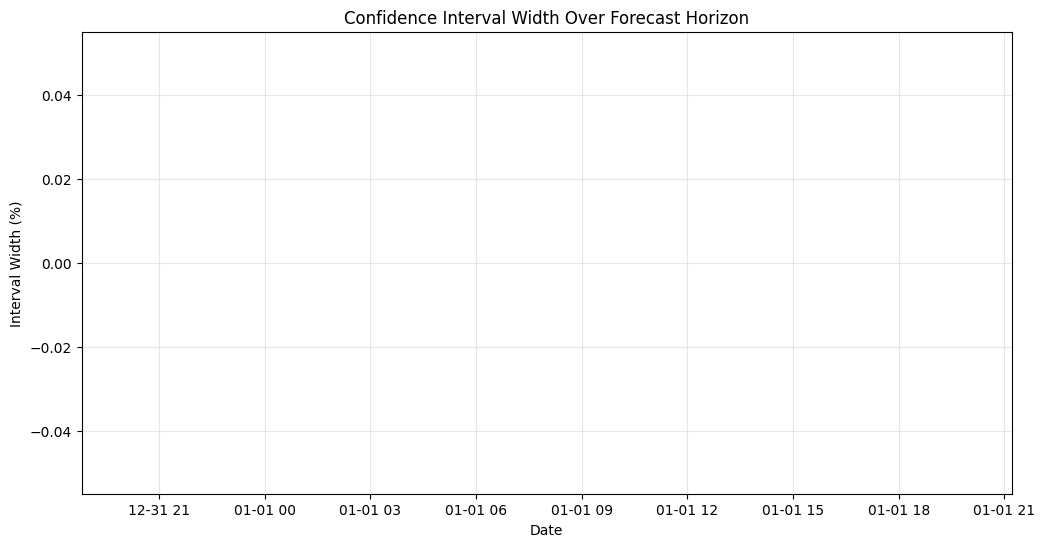

In [11]:
if arima_result and 'confidence_intervals' in arima_result:
    conf_int = arima_result['confidence_intervals']
    forecast = arima_result['forecast']
    
    # Calculate interval width over time
    interval_width = conf_int['upper'] - conf_int['lower']
    width_pct = interval_width / forecast * 100
    
    initial_width = width_pct.iloc[:21].mean()  # First month
    final_width = width_pct.iloc[-21:].mean()   # Last month
    width_expansion = (final_width - initial_width) / initial_width * 100
    
    print("📊 CONFIDENCE INTERVAL ANALYSIS:")
    print(f"Initial width: {initial_width:.1f}%")
    print(f"Final width: {final_width:.1f}%")
    print(f"Width expansion: {width_expansion:.1f}%")
    
    if width_expansion < 20:
        reliability = "High reliability - confidence intervals remain stable"
    elif width_expansion < 50:
        reliability = "Moderate reliability - some uncertainty increase"
    else:
        reliability = "Low reliability - significant long-term uncertainty"
    
    print(f"Reliability: {reliability}")
    
    # Plot confidence interval width over time
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    plt.plot(width_pct.index, width_pct.values)
    plt.title('Confidence Interval Width Over Forecast Horizon')
    plt.xlabel('Date')
    plt.ylabel('Interval Width (%)')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No confidence intervals available for analysis")

## 10. Summary Dashboard

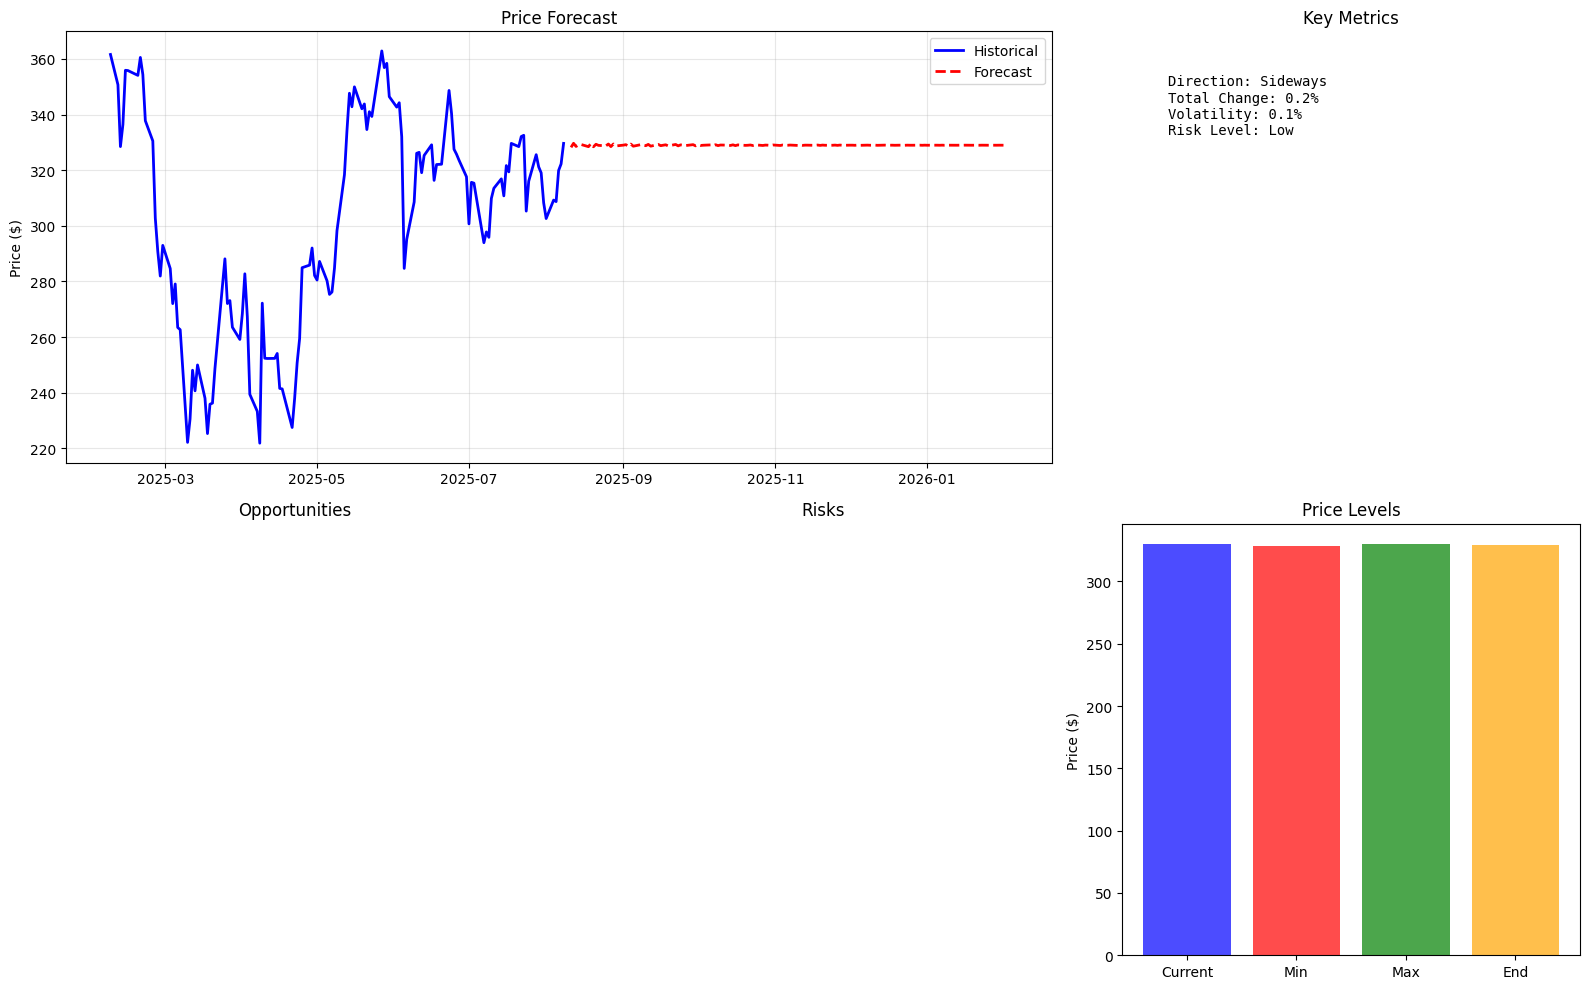

In [12]:
# Create summary dashboard for the best available model
if arima_result:
    opportunities = TrendAnalyzer.identify_opportunities(trend_data, risk_data)
    risks = TrendAnalyzer.identify_risks(trend_data, risk_data)
    
    ForecastVisualizer.create_summary_dashboard(
        arima_result['historical_data'],
        arima_result['forecast'],
        trend_data,
        risk_data,
        opportunities,
        risks
    )
elif lstm_result:
    opportunities = TrendAnalyzer.identify_opportunities(lstm_trend, lstm_risk)
    risks = TrendAnalyzer.identify_risks(lstm_trend, lstm_risk)
    
    ForecastVisualizer.create_summary_dashboard(
        lstm_result['historical_data'],
        lstm_result['forecast'],
        lstm_trend,
        lstm_risk,
        opportunities,
        risks
    )

## 🎯 Task 3 Complete!

This notebook demonstrated:
- ✅ **6-month forecasting** using trained ARIMA/LSTM models
- ✅ **Trend analysis** with direction and strength detection
- ✅ **Risk assessment** including volatility and uncertainty analysis
- ✅ **Confidence interval analysis** showing forecast reliability over time
- ✅ **Opportunity and risk identification** for investment decisions
- ✅ **Investment recommendations** based on forecast analysis
- ✅ **Comprehensive visualizations** for all analysis components

The analysis provides actionable insights for Tesla stock investment decisions based on quantitative forecasting models.